# Classification with Decision Trees

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from classification_utils import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import statistics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA

In [45]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [46]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std']


In [47]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.5, 0.2],
              'max_depth' : np.arange(2, 20, 1),
              'criterion' :['gini', 'entropy']
             }


dt = tree.DecisionTreeClassifier()

grid = GridSearchCV(
    dt,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)


grid.fit(train_set, train_label)
print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=2, max_features=auto;, score=0.532 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=2, max_features=auto;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=2, max_features=auto;, score=0.796 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=2, max_features=auto;, score=0.763 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=2, max_features=auto;, score=0.862 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=2, max_features=sqrt;, score=0.532 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=2, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=2, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=2, max_features=sq

[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=auto;, score=0.842 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=auto;, score=0.865 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=auto;, score=0.762 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=sqrt;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=sqrt;, score=0.768 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=sqrt;, score=0.842 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=log2;, score=0.532 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, 

[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=13, max_features=log2;, score=0.532 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=13, max_features=log2;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=13, max_features=log2;, score=0.826 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=13, max_features=log2;, score=0.752 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=13, max_features=log2;, score=0.772 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=14, max_features=auto;, score=0.532 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=14, max_features=auto;, score=0.752 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=14, max_features=auto;, score=0.531 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=14, max_features=auto;, score=0.845 total time=   0.0s
[CV 5/5] END ccp_al

[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=19, max_features=sqrt;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=19, max_features=sqrt;, score=0.871 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=19, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=19, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=19, max_features=sqrt;, score=0.772 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=19, max_features=log2;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=19, max_features=log2;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=19, max_features=log2;, score=0.842 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=19, max_features=log2;, score=0.845 total time=   0.0s
[CV 5/5] END ccp_al

[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=6, max_features=log2;, score=0.716 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=6, max_features=log2;, score=0.690 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=6, max_features=log2;, score=0.771 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto;, score=0.754 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto;, score=0.810 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto;, score=0.842 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.853 total time=   0.0s
[

[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=12, max_features=auto;, score=0.772 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=12, max_features=auto;, score=0.862 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=12, max_features=sqrt;, score=0.839 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=12, max_features=sqrt;, score=0.864 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=12, max_features=sqrt;, score=0.842 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=12, max_features=sqrt;, score=0.865 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=12, max_features=sqrt;, score=0.741 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=12, max_features=log2;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=12, max_features=log2;, score=0.767 total time=

[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=17, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=17, max_features=sqrt;, score=0.842 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=17, max_features=sqrt;, score=0.760 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=17, max_features=sqrt;, score=0.862 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=17, max_features=log2;, score=0.783 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=17, max_features=log2;, score=0.871 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=17, max_features=log2;, score=0.755 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=17, max_features=log2;, score=0.760 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=17, max_features=log2;, score=0.531 total time=

[CV 3/5] END ccp_alpha=0.05, criterion=gini, max_depth=5, max_features=auto;, score=0.716 total time=   0.0s
[CV 4/5] END ccp_alpha=0.05, criterion=gini, max_depth=5, max_features=auto;, score=0.719 total time=   0.0s
[CV 5/5] END ccp_alpha=0.05, criterion=gini, max_depth=5, max_features=auto;, score=0.862 total time=   0.0s
[CV 1/5] END ccp_alpha=0.05, criterion=gini, max_depth=5, max_features=sqrt;, score=0.838 total time=   0.0s
[CV 2/5] END ccp_alpha=0.05, criterion=gini, max_depth=5, max_features=sqrt;, score=0.852 total time=   0.0s
[CV 3/5] END ccp_alpha=0.05, criterion=gini, max_depth=5, max_features=sqrt;, score=0.647 total time=   0.0s
[CV 4/5] END ccp_alpha=0.05, criterion=gini, max_depth=5, max_features=sqrt;, score=0.865 total time=   0.0s
[CV 5/5] END ccp_alpha=0.05, criterion=gini, max_depth=5, max_features=sqrt;, score=0.849 total time=   0.0s
[CV 1/5] END ccp_alpha=0.05, criterion=gini, max_depth=5, max_features=log2;, score=0.669 total time=   0.0s
[CV 2/5] END ccp_al

[CV 4/5] END ccp_alpha=0.05, criterion=gini, max_depth=11, max_features=sqrt;, score=0.744 total time=   0.0s
[CV 5/5] END ccp_alpha=0.05, criterion=gini, max_depth=11, max_features=sqrt;, score=0.678 total time=   0.0s
[CV 1/5] END ccp_alpha=0.05, criterion=gini, max_depth=11, max_features=log2;, score=0.754 total time=   0.0s
[CV 2/5] END ccp_alpha=0.05, criterion=gini, max_depth=11, max_features=log2;, score=0.757 total time=   0.0s
[CV 3/5] END ccp_alpha=0.05, criterion=gini, max_depth=11, max_features=log2;, score=0.725 total time=   0.0s
[CV 4/5] END ccp_alpha=0.05, criterion=gini, max_depth=11, max_features=log2;, score=0.719 total time=   0.0s
[CV 5/5] END ccp_alpha=0.05, criterion=gini, max_depth=11, max_features=log2;, score=0.747 total time=   0.0s
[CV 1/5] END ccp_alpha=0.05, criterion=gini, max_depth=12, max_features=auto;, score=0.532 total time=   0.0s
[CV 2/5] END ccp_alpha=0.05, criterion=gini, max_depth=12, max_features=auto;, score=0.531 total time=   0.0s
[CV 3/5] E

[CV 5/5] END ccp_alpha=0.05, criterion=gini, max_depth=17, max_features=sqrt;, score=0.672 total time=   0.0s
[CV 1/5] END ccp_alpha=0.05, criterion=gini, max_depth=17, max_features=log2;, score=0.773 total time=   0.0s
[CV 2/5] END ccp_alpha=0.05, criterion=gini, max_depth=17, max_features=log2;, score=0.804 total time=   0.0s
[CV 3/5] END ccp_alpha=0.05, criterion=gini, max_depth=17, max_features=log2;, score=0.761 total time=   0.0s
[CV 4/5] END ccp_alpha=0.05, criterion=gini, max_depth=17, max_features=log2;, score=0.752 total time=   0.0s
[CV 5/5] END ccp_alpha=0.05, criterion=gini, max_depth=17, max_features=log2;, score=0.682 total time=   0.0s
[CV 1/5] END ccp_alpha=0.05, criterion=gini, max_depth=18, max_features=auto;, score=0.797 total time=   0.0s
[CV 2/5] END ccp_alpha=0.05, criterion=gini, max_depth=18, max_features=auto;, score=0.749 total time=   0.0s
[CV 3/5] END ccp_alpha=0.05, criterion=gini, max_depth=18, max_features=auto;, score=0.755 total time=   0.0s
[CV 4/5] E

[CV 5/5] END ccp_alpha=0.05, criterion=entropy, max_depth=5, max_features=log2;, score=0.771 total time=   0.0s
[CV 1/5] END ccp_alpha=0.05, criterion=entropy, max_depth=6, max_features=auto;, score=0.797 total time=   0.0s
[CV 2/5] END ccp_alpha=0.05, criterion=entropy, max_depth=6, max_features=auto;, score=0.804 total time=   0.0s
[CV 3/5] END ccp_alpha=0.05, criterion=entropy, max_depth=6, max_features=auto;, score=0.711 total time=   0.0s
[CV 4/5] END ccp_alpha=0.05, criterion=entropy, max_depth=6, max_features=auto;, score=0.865 total time=   0.0s
[CV 5/5] END ccp_alpha=0.05, criterion=entropy, max_depth=6, max_features=auto;, score=0.771 total time=   0.0s
[CV 1/5] END ccp_alpha=0.05, criterion=entropy, max_depth=6, max_features=sqrt;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=0.05, criterion=entropy, max_depth=6, max_features=sqrt;, score=0.871 total time=   0.0s
[CV 3/5] END ccp_alpha=0.05, criterion=entropy, max_depth=6, max_features=sqrt;, score=0.837 total time=

[CV 3/5] END ccp_alpha=0.05, criterion=entropy, max_depth=11, max_features=sqrt;, score=0.747 total time=   0.0s
[CV 4/5] END ccp_alpha=0.05, criterion=entropy, max_depth=11, max_features=sqrt;, score=0.760 total time=   0.0s
[CV 5/5] END ccp_alpha=0.05, criterion=entropy, max_depth=11, max_features=sqrt;, score=0.862 total time=   0.0s
[CV 1/5] END ccp_alpha=0.05, criterion=entropy, max_depth=11, max_features=log2;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=0.05, criterion=entropy, max_depth=11, max_features=log2;, score=0.735 total time=   0.0s
[CV 3/5] END ccp_alpha=0.05, criterion=entropy, max_depth=11, max_features=log2;, score=0.790 total time=   0.0s
[CV 4/5] END ccp_alpha=0.05, criterion=entropy, max_depth=11, max_features=log2;, score=0.783 total time=   0.0s
[CV 5/5] END ccp_alpha=0.05, criterion=entropy, max_depth=11, max_features=log2;, score=0.840 total time=   0.0s
[CV 1/5] END ccp_alpha=0.05, criterion=entropy, max_depth=12, max_features=auto;, score=0.890 to

[CV 2/5] END ccp_alpha=0.05, criterion=entropy, max_depth=17, max_features=auto;, score=0.907 total time=   0.0s
[CV 3/5] END ccp_alpha=0.05, criterion=entropy, max_depth=17, max_features=auto;, score=0.849 total time=   0.0s
[CV 4/5] END ccp_alpha=0.05, criterion=entropy, max_depth=17, max_features=auto;, score=0.772 total time=   0.0s
[CV 5/5] END ccp_alpha=0.05, criterion=entropy, max_depth=17, max_features=auto;, score=0.899 total time=   0.0s
[CV 1/5] END ccp_alpha=0.05, criterion=entropy, max_depth=17, max_features=sqrt;, score=0.788 total time=   0.0s
[CV 2/5] END ccp_alpha=0.05, criterion=entropy, max_depth=17, max_features=sqrt;, score=0.850 total time=   0.0s
[CV 3/5] END ccp_alpha=0.05, criterion=entropy, max_depth=17, max_features=sqrt;, score=0.754 total time=   0.0s
[CV 4/5] END ccp_alpha=0.05, criterion=entropy, max_depth=17, max_features=sqrt;, score=0.783 total time=   0.0s
[CV 5/5] END ccp_alpha=0.05, criterion=entropy, max_depth=17, max_features=sqrt;, score=0.782 to

[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=4, max_features=log2;, score=0.865 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=4, max_features=log2;, score=0.857 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=auto;, score=0.850 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=auto;, score=0.871 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=auto;, score=0.884 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=auto;, score=0.881 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=auto;, score=0.849 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=sqrt;, score=0.777 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=sqrt;, score=0.871 total time=   0.0s
[CV 3/5] END ccp_al

[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=10, max_features=auto;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=10, max_features=auto;, score=0.829 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=10, max_features=auto;, score=0.756 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=10, max_features=auto;, score=0.854 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=10, max_features=auto;, score=0.814 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=10, max_features=sqrt;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=10, max_features=sqrt;, score=0.860 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=10, max_features=sqrt;, score=0.790 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=10, max_features=sqrt;, score=0.785 total time=   0.0s
[CV 5/5] E

[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=15, max_features=sqrt;, score=0.849 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=15, max_features=sqrt;, score=0.786 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=15, max_features=sqrt;, score=0.874 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=15, max_features=sqrt;, score=0.862 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=15, max_features=log2;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=15, max_features=log2;, score=0.852 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=15, max_features=log2;, score=0.793 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=15, max_features=log2;, score=0.815 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=15, max_features=log2;, score=0.863 total time=   0.0s
[CV 1/5] E

[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=4, max_features=sqrt;, score=0.789 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=4, max_features=log2;, score=0.830 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=4, max_features=log2;, score=0.907 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=4, max_features=log2;, score=0.787 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=4, max_features=log2;, score=0.851 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=4, max_features=log2;, score=0.844 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=auto;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=auto;, score=0.889 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=auto;, score=0.822 total time=

[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=10, max_features=sqrt;, score=0.855 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=10, max_features=log2;, score=0.876 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=10, max_features=log2;, score=0.873 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=10, max_features=log2;, score=0.891 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=10, max_features=log2;, score=0.858 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=10, max_features=log2;, score=0.870 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=11, max_features=auto;, score=0.854 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=11, max_features=auto;, score=0.885 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=11, max_features=auto;, score=0.842 to

[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=16, max_features=sqrt;, score=0.882 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=16, max_features=sqrt;, score=0.896 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=16, max_features=sqrt;, score=0.881 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=16, max_features=sqrt;, score=0.816 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=16, max_features=sqrt;, score=0.897 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=16, max_features=log2;, score=0.854 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=16, max_features=log2;, score=0.817 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=16, max_features=log2;, score=0.816 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=16, max_features=log2;, score=0.824 to

[CV 2/5] END ccp_alpha=0.005, criterion=gini, max_depth=5, max_features=sqrt;, score=0.845 total time=   0.0s
[CV 3/5] END ccp_alpha=0.005, criterion=gini, max_depth=5, max_features=sqrt;, score=0.780 total time=   0.0s
[CV 4/5] END ccp_alpha=0.005, criterion=gini, max_depth=5, max_features=sqrt;, score=0.819 total time=   0.0s
[CV 5/5] END ccp_alpha=0.005, criterion=gini, max_depth=5, max_features=sqrt;, score=0.901 total time=   0.0s
[CV 1/5] END ccp_alpha=0.005, criterion=gini, max_depth=5, max_features=log2;, score=0.867 total time=   0.0s
[CV 2/5] END ccp_alpha=0.005, criterion=gini, max_depth=5, max_features=log2;, score=0.864 total time=   0.0s
[CV 3/5] END ccp_alpha=0.005, criterion=gini, max_depth=5, max_features=log2;, score=0.876 total time=   0.0s
[CV 4/5] END ccp_alpha=0.005, criterion=gini, max_depth=5, max_features=log2;, score=0.851 total time=   0.0s
[CV 5/5] END ccp_alpha=0.005, criterion=gini, max_depth=5, max_features=log2;, score=0.849 total time=   0.0s
[CV 1/5] E

[CV 3/5] END ccp_alpha=0.005, criterion=gini, max_depth=10, max_features=sqrt;, score=0.873 total time=   0.0s
[CV 4/5] END ccp_alpha=0.005, criterion=gini, max_depth=10, max_features=sqrt;, score=0.871 total time=   0.0s
[CV 5/5] END ccp_alpha=0.005, criterion=gini, max_depth=10, max_features=sqrt;, score=0.867 total time=   0.0s
[CV 1/5] END ccp_alpha=0.005, criterion=gini, max_depth=10, max_features=log2;, score=0.873 total time=   0.0s
[CV 2/5] END ccp_alpha=0.005, criterion=gini, max_depth=10, max_features=log2;, score=0.892 total time=   0.0s
[CV 3/5] END ccp_alpha=0.005, criterion=gini, max_depth=10, max_features=log2;, score=0.842 total time=   0.0s
[CV 4/5] END ccp_alpha=0.005, criterion=gini, max_depth=10, max_features=log2;, score=0.867 total time=   0.0s
[CV 5/5] END ccp_alpha=0.005, criterion=gini, max_depth=10, max_features=log2;, score=0.881 total time=   0.0s
[CV 1/5] END ccp_alpha=0.005, criterion=gini, max_depth=11, max_features=auto;, score=0.878 total time=   0.0s
[

[CV 3/5] END ccp_alpha=0.005, criterion=gini, max_depth=15, max_features=sqrt;, score=0.804 total time=   0.0s
[CV 4/5] END ccp_alpha=0.005, criterion=gini, max_depth=15, max_features=sqrt;, score=0.827 total time=   0.0s
[CV 5/5] END ccp_alpha=0.005, criterion=gini, max_depth=15, max_features=sqrt;, score=0.847 total time=   0.0s
[CV 1/5] END ccp_alpha=0.005, criterion=gini, max_depth=15, max_features=log2;, score=0.860 total time=   0.0s
[CV 2/5] END ccp_alpha=0.005, criterion=gini, max_depth=15, max_features=log2;, score=0.907 total time=   0.0s
[CV 3/5] END ccp_alpha=0.005, criterion=gini, max_depth=15, max_features=log2;, score=0.869 total time=   0.0s
[CV 4/5] END ccp_alpha=0.005, criterion=gini, max_depth=15, max_features=log2;, score=0.847 total time=   0.0s
[CV 5/5] END ccp_alpha=0.005, criterion=gini, max_depth=15, max_features=log2;, score=0.878 total time=   0.0s
[CV 1/5] END ccp_alpha=0.005, criterion=gini, max_depth=16, max_features=auto;, score=0.890 total time=   0.0s
[

[CV 3/5] END ccp_alpha=0.005, criterion=entropy, max_depth=2, max_features=sqrt;, score=0.842 total time=   0.0s
[CV 4/5] END ccp_alpha=0.005, criterion=entropy, max_depth=2, max_features=sqrt;, score=0.865 total time=   0.0s
[CV 5/5] END ccp_alpha=0.005, criterion=entropy, max_depth=2, max_features=sqrt;, score=0.784 total time=   0.0s
[CV 1/5] END ccp_alpha=0.005, criterion=entropy, max_depth=2, max_features=log2;, score=0.782 total time=   0.0s
[CV 2/5] END ccp_alpha=0.005, criterion=entropy, max_depth=2, max_features=log2;, score=0.755 total time=   0.0s
[CV 3/5] END ccp_alpha=0.005, criterion=entropy, max_depth=2, max_features=log2;, score=0.842 total time=   0.0s
[CV 4/5] END ccp_alpha=0.005, criterion=entropy, max_depth=2, max_features=log2;, score=0.847 total time=   0.0s
[CV 5/5] END ccp_alpha=0.005, criterion=entropy, max_depth=2, max_features=log2;, score=0.771 total time=   0.0s
[CV 1/5] END ccp_alpha=0.005, criterion=entropy, max_depth=3, max_features=auto;, score=0.782 to

[CV 3/5] END ccp_alpha=0.005, criterion=entropy, max_depth=8, max_features=auto;, score=0.890 total time=   0.0s
[CV 4/5] END ccp_alpha=0.005, criterion=entropy, max_depth=8, max_features=auto;, score=0.880 total time=   0.0s
[CV 5/5] END ccp_alpha=0.005, criterion=entropy, max_depth=8, max_features=auto;, score=0.836 total time=   0.0s
[CV 1/5] END ccp_alpha=0.005, criterion=entropy, max_depth=8, max_features=sqrt;, score=0.880 total time=   0.0s
[CV 2/5] END ccp_alpha=0.005, criterion=entropy, max_depth=8, max_features=sqrt;, score=0.805 total time=   0.0s
[CV 3/5] END ccp_alpha=0.005, criterion=entropy, max_depth=8, max_features=sqrt;, score=0.815 total time=   0.0s
[CV 4/5] END ccp_alpha=0.005, criterion=entropy, max_depth=8, max_features=sqrt;, score=0.890 total time=   0.0s
[CV 5/5] END ccp_alpha=0.005, criterion=entropy, max_depth=8, max_features=sqrt;, score=0.860 total time=   0.0s
[CV 1/5] END ccp_alpha=0.005, criterion=entropy, max_depth=8, max_features=log2;, score=0.889 to

[CV 3/5] END ccp_alpha=0.005, criterion=entropy, max_depth=13, max_features=auto;, score=0.816 total time=   0.0s
[CV 4/5] END ccp_alpha=0.005, criterion=entropy, max_depth=13, max_features=auto;, score=0.878 total time=   0.0s
[CV 5/5] END ccp_alpha=0.005, criterion=entropy, max_depth=13, max_features=auto;, score=0.883 total time=   0.0s
[CV 1/5] END ccp_alpha=0.005, criterion=entropy, max_depth=13, max_features=sqrt;, score=0.826 total time=   0.0s
[CV 2/5] END ccp_alpha=0.005, criterion=entropy, max_depth=13, max_features=sqrt;, score=0.904 total time=   0.0s
[CV 3/5] END ccp_alpha=0.005, criterion=entropy, max_depth=13, max_features=sqrt;, score=0.859 total time=   0.0s
[CV 4/5] END ccp_alpha=0.005, criterion=entropy, max_depth=13, max_features=sqrt;, score=0.867 total time=   0.0s
[CV 5/5] END ccp_alpha=0.005, criterion=entropy, max_depth=13, max_features=sqrt;, score=0.883 total time=   0.0s
[CV 1/5] END ccp_alpha=0.005, criterion=entropy, max_depth=13, max_features=log2;, score

[CV 3/5] END ccp_alpha=0.005, criterion=entropy, max_depth=18, max_features=sqrt;, score=0.858 total time=   0.0s
[CV 4/5] END ccp_alpha=0.005, criterion=entropy, max_depth=18, max_features=sqrt;, score=0.837 total time=   0.0s
[CV 5/5] END ccp_alpha=0.005, criterion=entropy, max_depth=18, max_features=sqrt;, score=0.843 total time=   0.0s
[CV 1/5] END ccp_alpha=0.005, criterion=entropy, max_depth=18, max_features=log2;, score=0.865 total time=   0.0s
[CV 2/5] END ccp_alpha=0.005, criterion=entropy, max_depth=18, max_features=log2;, score=0.908 total time=   0.0s
[CV 3/5] END ccp_alpha=0.005, criterion=entropy, max_depth=18, max_features=log2;, score=0.870 total time=   0.0s
[CV 4/5] END ccp_alpha=0.005, criterion=entropy, max_depth=18, max_features=log2;, score=0.887 total time=   0.0s
[CV 5/5] END ccp_alpha=0.005, criterion=entropy, max_depth=18, max_features=log2;, score=0.893 total time=   0.0s
[CV 1/5] END ccp_alpha=0.005, criterion=entropy, max_depth=19, max_features=auto;, score

[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=log2;, score=0.777 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=log2;, score=0.865 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=log2;, score=0.814 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=6, max_features=auto;, score=0.860 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=6, max_features=auto;, score=0.859 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=6, max_features=auto;, score=0.860 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=6, max_features=auto;, score=0.883 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=6, max_features=auto;, score=0.868 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=6, max_features=sqrt;, score=0.879 total time=   0.0s
[CV 2/5] E

[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=12, max_features=auto;, score=0.901 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=12, max_features=auto;, score=0.893 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=12, max_features=auto;, score=0.860 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=12, max_features=auto;, score=0.892 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=12, max_features=sqrt;, score=0.854 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=12, max_features=sqrt;, score=0.876 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=12, max_features=sqrt;, score=0.867 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=12, max_features=sqrt;, score=0.880 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=12, max_features=sqrt;, score=0.891 total time=   0.0s
[

[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=17, max_features=auto;, score=0.856 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=17, max_features=auto;, score=0.876 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=17, max_features=auto;, score=0.857 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=17, max_features=auto;, score=0.881 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=17, max_features=auto;, score=0.892 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=17, max_features=sqrt;, score=0.888 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=17, max_features=sqrt;, score=0.876 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=17, max_features=sqrt;, score=0.881 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=17, max_features=sqrt;, score=0.878 total time=   0.0s
[

[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=auto;, score=0.805 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=auto;, score=0.858 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.817 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.854 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.878 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.865 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.828 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=log2;, score=0.890 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=log2;, score=0.906 to

[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=11, max_features=auto;, score=0.883 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=11, max_features=auto;, score=0.902 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=11, max_features=auto;, score=0.882 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=11, max_features=auto;, score=0.885 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=11, max_features=auto;, score=0.870 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=11, max_features=sqrt;, score=0.880 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=11, max_features=sqrt;, score=0.896 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=11, max_features=sqrt;, score=0.885 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=11, max_features=sqrt;, score

[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=16, max_features=sqrt;, score=0.883 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=16, max_features=sqrt;, score=0.889 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=16, max_features=sqrt;, score=0.868 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=16, max_features=sqrt;, score=0.896 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=16, max_features=sqrt;, score=0.895 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=16, max_features=log2;, score=0.886 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=16, max_features=log2;, score=0.877 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=16, max_features=log2;, score=0.873 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=16, max_features=log2;, score

[CV 4/5] END ccp_alpha=0.0005, criterion=gini, max_depth=5, max_features=auto;, score=0.852 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0005, criterion=gini, max_depth=5, max_features=auto;, score=0.885 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0005, criterion=gini, max_depth=5, max_features=sqrt;, score=0.803 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0005, criterion=gini, max_depth=5, max_features=sqrt;, score=0.804 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0005, criterion=gini, max_depth=5, max_features=sqrt;, score=0.893 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0005, criterion=gini, max_depth=5, max_features=sqrt;, score=0.860 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0005, criterion=gini, max_depth=5, max_features=sqrt;, score=0.821 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0005, criterion=gini, max_depth=5, max_features=log2;, score=0.809 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0005, criterion=gini, max_depth=5, max_features=log2;, score=0.897 total time=   0.0s
[

[CV 1/5] END ccp_alpha=0.0005, criterion=gini, max_depth=10, max_features=sqrt;, score=0.855 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0005, criterion=gini, max_depth=10, max_features=sqrt;, score=0.884 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0005, criterion=gini, max_depth=10, max_features=sqrt;, score=0.877 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0005, criterion=gini, max_depth=10, max_features=sqrt;, score=0.893 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0005, criterion=gini, max_depth=10, max_features=sqrt;, score=0.886 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0005, criterion=gini, max_depth=10, max_features=log2;, score=0.871 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0005, criterion=gini, max_depth=10, max_features=log2;, score=0.899 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0005, criterion=gini, max_depth=10, max_features=log2;, score=0.880 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0005, criterion=gini, max_depth=10, max_features=log2;, score=0.890 total time=

[CV 1/5] END ccp_alpha=0.0005, criterion=gini, max_depth=15, max_features=log2;, score=0.883 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0005, criterion=gini, max_depth=15, max_features=log2;, score=0.893 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0005, criterion=gini, max_depth=15, max_features=log2;, score=0.866 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0005, criterion=gini, max_depth=15, max_features=log2;, score=0.868 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0005, criterion=gini, max_depth=15, max_features=log2;, score=0.890 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0005, criterion=gini, max_depth=16, max_features=auto;, score=0.858 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0005, criterion=gini, max_depth=16, max_features=auto;, score=0.903 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0005, criterion=gini, max_depth=16, max_features=auto;, score=0.886 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0005, criterion=gini, max_depth=16, max_features=auto;, score=0.884 total time=

[CV 5/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=2, max_features=log2;, score=0.774 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=3, max_features=auto;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=3, max_features=auto;, score=0.802 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=3, max_features=auto;, score=0.840 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=3, max_features=auto;, score=0.826 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=3, max_features=auto;, score=0.859 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.795 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=3, max_features=sqrt;, score=0.811 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=3, max_features=sqrt;, score

[CV 2/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=8, max_features=sqrt;, score=0.882 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=8, max_features=sqrt;, score=0.872 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=8, max_features=sqrt;, score=0.860 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=8, max_features=sqrt;, score=0.899 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=8, max_features=log2;, score=0.884 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=8, max_features=log2;, score=0.866 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=8, max_features=log2;, score=0.888 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=8, max_features=log2;, score=0.885 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=8, max_features=log2;, score

[CV 1/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=13, max_features=sqrt;, score=0.878 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=13, max_features=sqrt;, score=0.875 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=13, max_features=sqrt;, score=0.885 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=13, max_features=sqrt;, score=0.888 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=13, max_features=sqrt;, score=0.881 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=13, max_features=log2;, score=0.873 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=13, max_features=log2;, score=0.908 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=13, max_features=log2;, score=0.868 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=13, max_features=log

[CV 1/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=18, max_features=log2;, score=0.879 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=18, max_features=log2;, score=0.882 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=18, max_features=log2;, score=0.876 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=18, max_features=log2;, score=0.872 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=18, max_features=log2;, score=0.875 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=19, max_features=auto;, score=0.844 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=19, max_features=auto;, score=0.849 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=19, max_features=auto;, score=0.865 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0005, criterion=entropy, max_depth=19, max_features=aut

[CV 2/5] END ccp_alpha=0.0001, criterion=gini, max_depth=6, max_features=auto;, score=0.828 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=gini, max_depth=6, max_features=auto;, score=0.888 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=gini, max_depth=6, max_features=auto;, score=0.864 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=gini, max_depth=6, max_features=auto;, score=0.862 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=gini, max_depth=6, max_features=sqrt;, score=0.863 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=gini, max_depth=6, max_features=sqrt;, score=0.825 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=gini, max_depth=6, max_features=sqrt;, score=0.811 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=gini, max_depth=6, max_features=sqrt;, score=0.883 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=gini, max_depth=6, max_features=sqrt;, score=0.875 total time=   0.0s
[

[CV 5/5] END ccp_alpha=0.0001, criterion=gini, max_depth=12, max_features=auto;, score=0.863 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=gini, max_depth=12, max_features=sqrt;, score=0.867 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=gini, max_depth=12, max_features=sqrt;, score=0.884 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=gini, max_depth=12, max_features=sqrt;, score=0.881 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=gini, max_depth=12, max_features=sqrt;, score=0.856 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=gini, max_depth=12, max_features=sqrt;, score=0.865 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=gini, max_depth=12, max_features=log2;, score=0.867 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=gini, max_depth=12, max_features=log2;, score=0.897 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=gini, max_depth=12, max_features=log2;, score=0.875 total time=

[CV 5/5] END ccp_alpha=0.0001, criterion=gini, max_depth=18, max_features=auto;, score=0.883 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=gini, max_depth=18, max_features=sqrt;, score=0.839 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=gini, max_depth=18, max_features=sqrt;, score=0.868 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=gini, max_depth=18, max_features=sqrt;, score=0.852 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=gini, max_depth=18, max_features=sqrt;, score=0.873 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=gini, max_depth=18, max_features=sqrt;, score=0.855 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=gini, max_depth=18, max_features=log2;, score=0.854 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=gini, max_depth=18, max_features=log2;, score=0.876 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=gini, max_depth=18, max_features=log2;, score=0.875 total time=

[CV 2/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.903 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.842 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.864 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.895 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=5, max_features=log2;, score=0.888 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=5, max_features=log2;, score=0.906 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=5, max_features=log2;, score=0.885 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=5, max_features=log2;, score=0.863 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=5, max_features=log2;, score

[CV 3/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=11, max_features=auto;, score=0.865 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=11, max_features=auto;, score=0.877 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=11, max_features=auto;, score=0.883 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=11, max_features=sqrt;, score=0.875 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=11, max_features=sqrt;, score=0.893 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=11, max_features=sqrt;, score=0.876 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=11, max_features=sqrt;, score=0.885 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=11, max_features=sqrt;, score=0.875 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=11, max_features=log

[CV 5/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=16, max_features=sqrt;, score=0.862 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=16, max_features=log2;, score=0.871 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=16, max_features=log2;, score=0.859 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=16, max_features=log2;, score=0.868 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=16, max_features=log2;, score=0.875 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=16, max_features=log2;, score=0.884 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=17, max_features=auto;, score=0.855 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=17, max_features=auto;, score=0.879 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=entropy, max_depth=17, max_features=aut

[CV 4/5] END ccp_alpha=0.5, criterion=gini, max_depth=3, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.5, criterion=gini, max_depth=3, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.5, criterion=gini, max_depth=3, max_features=log2;, score=0.532 total time=   0.0s
[CV 2/5] END ccp_alpha=0.5, criterion=gini, max_depth=3, max_features=log2;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.5, criterion=gini, max_depth=3, max_features=log2;, score=0.531 total time=   0.0s
[CV 4/5] END ccp_alpha=0.5, criterion=gini, max_depth=3, max_features=log2;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.5, criterion=gini, max_depth=3, max_features=log2;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.5, criterion=gini, max_depth=4, max_features=auto;, score=0.532 total time=   0.0s
[CV 2/5] END ccp_alpha=0.5, criterion=gini, max_depth=4, max_features=auto;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.5, 

[CV 2/5] END ccp_alpha=0.5, criterion=gini, max_depth=9, max_features=auto;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.5, criterion=gini, max_depth=9, max_features=auto;, score=0.531 total time=   0.0s
[CV 4/5] END ccp_alpha=0.5, criterion=gini, max_depth=9, max_features=auto;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.5, criterion=gini, max_depth=9, max_features=auto;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.5, criterion=gini, max_depth=9, max_features=sqrt;, score=0.532 total time=   0.0s
[CV 2/5] END ccp_alpha=0.5, criterion=gini, max_depth=9, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.5, criterion=gini, max_depth=9, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 4/5] END ccp_alpha=0.5, criterion=gini, max_depth=9, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.5, criterion=gini, max_depth=9, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.5, 

[CV 3/5] END ccp_alpha=0.5, criterion=gini, max_depth=14, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 4/5] END ccp_alpha=0.5, criterion=gini, max_depth=14, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.5, criterion=gini, max_depth=14, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.5, criterion=gini, max_depth=14, max_features=log2;, score=0.532 total time=   0.0s
[CV 2/5] END ccp_alpha=0.5, criterion=gini, max_depth=14, max_features=log2;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.5, criterion=gini, max_depth=14, max_features=log2;, score=0.531 total time=   0.0s
[CV 4/5] END ccp_alpha=0.5, criterion=gini, max_depth=14, max_features=log2;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.5, criterion=gini, max_depth=14, max_features=log2;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.5, criterion=gini, max_depth=15, max_features=auto;, score=0.532 total time=   0.0s
[CV 2/5] END ccp_al

[CV 4/5] END ccp_alpha=0.5, criterion=entropy, max_depth=2, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.5, criterion=entropy, max_depth=2, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.5, criterion=entropy, max_depth=2, max_features=log2;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=0.5, criterion=entropy, max_depth=2, max_features=log2;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.5, criterion=entropy, max_depth=2, max_features=log2;, score=0.842 total time=   0.0s
[CV 4/5] END ccp_alpha=0.5, criterion=entropy, max_depth=2, max_features=log2;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.5, criterion=entropy, max_depth=2, max_features=log2;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.5, criterion=entropy, max_depth=3, max_features=auto;, score=0.532 total time=   0.0s
[CV 2/5] END ccp_alpha=0.5, criterion=entropy, max_depth=3, max_features=auto;, score=0.531 total time=   0.0s
[

[CV 4/5] END ccp_alpha=0.5, criterion=entropy, max_depth=7, max_features=log2;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.5, criterion=entropy, max_depth=7, max_features=log2;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.5, criterion=entropy, max_depth=8, max_features=auto;, score=0.532 total time=   0.0s
[CV 2/5] END ccp_alpha=0.5, criterion=entropy, max_depth=8, max_features=auto;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.5, criterion=entropy, max_depth=8, max_features=auto;, score=0.531 total time=   0.0s
[CV 4/5] END ccp_alpha=0.5, criterion=entropy, max_depth=8, max_features=auto;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.5, criterion=entropy, max_depth=8, max_features=auto;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.5, criterion=entropy, max_depth=8, max_features=sqrt;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=0.5, criterion=entropy, max_depth=8, max_features=sqrt;, score=0.531 total time=   0.0s
[

[CV 5/5] END ccp_alpha=0.5, criterion=entropy, max_depth=12, max_features=log2;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.5, criterion=entropy, max_depth=13, max_features=auto;, score=0.532 total time=   0.0s
[CV 2/5] END ccp_alpha=0.5, criterion=entropy, max_depth=13, max_features=auto;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.5, criterion=entropy, max_depth=13, max_features=auto;, score=0.842 total time=   0.0s
[CV 4/5] END ccp_alpha=0.5, criterion=entropy, max_depth=13, max_features=auto;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.5, criterion=entropy, max_depth=13, max_features=auto;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.5, criterion=entropy, max_depth=13, max_features=sqrt;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=0.5, criterion=entropy, max_depth=13, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.5, criterion=entropy, max_depth=13, max_features=sqrt;, score=0.531 total time=

[CV 4/5] END ccp_alpha=0.5, criterion=entropy, max_depth=18, max_features=auto;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.5, criterion=entropy, max_depth=18, max_features=auto;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.5, criterion=entropy, max_depth=18, max_features=sqrt;, score=0.532 total time=   0.0s
[CV 2/5] END ccp_alpha=0.5, criterion=entropy, max_depth=18, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.5, criterion=entropy, max_depth=18, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 4/5] END ccp_alpha=0.5, criterion=entropy, max_depth=18, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.5, criterion=entropy, max_depth=18, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.5, criterion=entropy, max_depth=18, max_features=log2;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=0.5, criterion=entropy, max_depth=18, max_features=log2;, score=0.531 total time=

[CV 1/5] END ccp_alpha=0.2, criterion=gini, max_depth=6, max_features=log2;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, criterion=gini, max_depth=6, max_features=log2;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, criterion=gini, max_depth=6, max_features=log2;, score=0.842 total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, criterion=gini, max_depth=6, max_features=log2;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, criterion=gini, max_depth=6, max_features=log2;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, criterion=gini, max_depth=7, max_features=auto;, score=0.532 total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, criterion=gini, max_depth=7, max_features=auto;, score=0.871 total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, criterion=gini, max_depth=7, max_features=auto;, score=0.531 total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, criterion=gini, max_depth=7, max_features=auto;, score=0.865 total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, 

[CV 2/5] END ccp_alpha=0.2, criterion=gini, max_depth=12, max_features=log2;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, criterion=gini, max_depth=12, max_features=log2;, score=0.531 total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, criterion=gini, max_depth=12, max_features=log2;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, criterion=gini, max_depth=12, max_features=log2;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, criterion=gini, max_depth=13, max_features=auto;, score=0.532 total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, criterion=gini, max_depth=13, max_features=auto;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, criterion=gini, max_depth=13, max_features=auto;, score=0.531 total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, criterion=gini, max_depth=13, max_features=auto;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, criterion=gini, max_depth=13, max_features=auto;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_al

[CV 5/5] END ccp_alpha=0.2, criterion=gini, max_depth=18, max_features=sqrt;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, criterion=gini, max_depth=18, max_features=log2;, score=0.532 total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, criterion=gini, max_depth=18, max_features=log2;, score=0.871 total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, criterion=gini, max_depth=18, max_features=log2;, score=0.531 total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, criterion=gini, max_depth=18, max_features=log2;, score=0.865 total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, criterion=gini, max_depth=18, max_features=log2;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, criterion=gini, max_depth=19, max_features=auto;, score=0.532 total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, criterion=gini, max_depth=19, max_features=auto;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, criterion=gini, max_depth=19, max_features=auto;, score=0.531 total time=   0.0s
[CV 4/5] END ccp_al

[CV 4/5] END ccp_alpha=0.2, criterion=entropy, max_depth=5, max_features=log2;, score=0.531 total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, criterion=entropy, max_depth=5, max_features=log2;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, criterion=entropy, max_depth=6, max_features=auto;, score=0.783 total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, criterion=entropy, max_depth=6, max_features=auto;, score=0.767 total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, criterion=entropy, max_depth=6, max_features=auto;, score=0.826 total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, criterion=entropy, max_depth=6, max_features=auto;, score=0.865 total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, criterion=entropy, max_depth=6, max_features=auto;, score=0.839 total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, criterion=entropy, max_depth=6, max_features=sqrt;, score=0.754 total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, criterion=entropy, max_depth=6, max_features=sqrt;, score=0.752 total time=   0.0s
[

[CV 4/5] END ccp_alpha=0.2, criterion=entropy, max_depth=11, max_features=sqrt;, score=0.865 total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, criterion=entropy, max_depth=11, max_features=sqrt;, score=0.760 total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, criterion=entropy, max_depth=11, max_features=log2;, score=0.783 total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, criterion=entropy, max_depth=11, max_features=log2;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, criterion=entropy, max_depth=11, max_features=log2;, score=0.842 total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, criterion=entropy, max_depth=11, max_features=log2;, score=0.865 total time=   0.1s
[CV 5/5] END ccp_alpha=0.2, criterion=entropy, max_depth=11, max_features=log2;, score=0.760 total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, criterion=entropy, max_depth=12, max_features=auto;, score=0.783 total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, criterion=entropy, max_depth=12, max_features=auto;, score=0.871 total time=

[CV 3/5] END ccp_alpha=0.2, criterion=entropy, max_depth=16, max_features=log2;, score=0.739 total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, criterion=entropy, max_depth=16, max_features=log2;, score=0.847 total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, criterion=entropy, max_depth=16, max_features=log2;, score=0.862 total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, criterion=entropy, max_depth=17, max_features=auto;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, criterion=entropy, max_depth=17, max_features=auto;, score=0.531 total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, criterion=entropy, max_depth=17, max_features=auto;, score=0.842 total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, criterion=entropy, max_depth=17, max_features=auto;, score=0.760 total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, criterion=entropy, max_depth=17, max_features=auto;, score=0.531 total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, criterion=entropy, max_depth=17, max_features=sqrt;, score=0.532 total time=

In [48]:
dt = grid.best_estimator_

In [49]:
dt

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=11, max_features='log2')

In [50]:
train_pred = dt.predict(train_set)
test_pred = dt.predict(test_set)

In [51]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.8968342644320298
Accuracy test set  0.8774978279756733
Precision train set  0.9100221624177277
Recall train set  0.8968342644320298
F1 score train set  0.8953144663371255
Support train set  (array([0.9858039 , 0.84321528]), array([0.79120297, 0.98995562]), array([0.87784801, 0.91071237]), array([3774, 4281]))


In [52]:
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.98      0.75      0.85      1618
         >50       0.82      0.99      0.90      1835

    accuracy                           0.88      3453
   macro avg       0.90      0.87      0.87      3453
weighted avg       0.90      0.88      0.88      3453



In [53]:
# cross validation
scores = cross_validate(dt, train_set, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.012801488240559896
Score time  0.0016243457794189453
Test score  0.8811918063314711
Train score  0.884729981378026


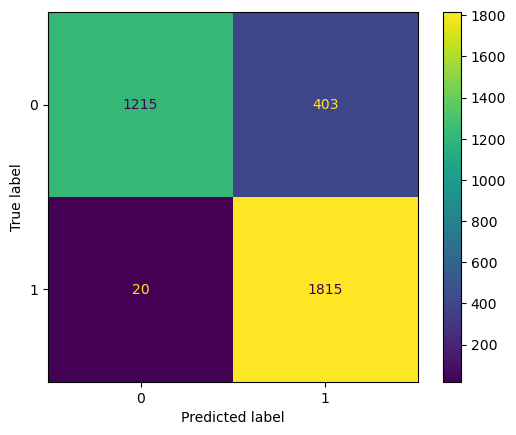

In [54]:
predictions = dt.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [55]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

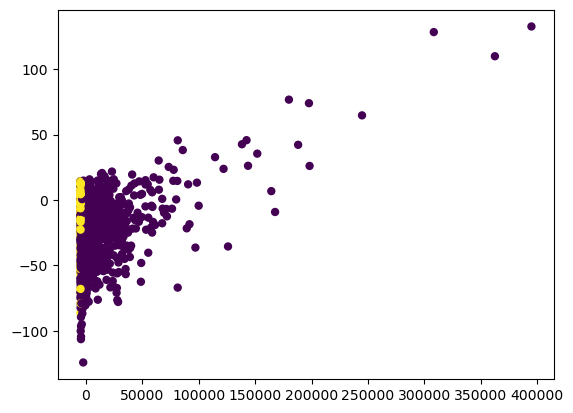

In [56]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

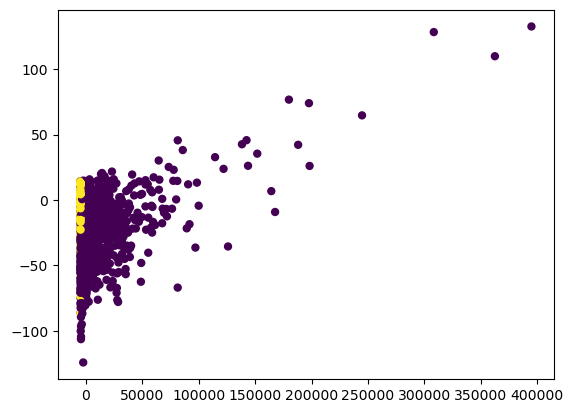

In [57]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);